In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
csv_data = np.genfromtxt("과제공지/satisfaction_data.csv", delimiter=',', dtype=None, encoding='UTF-8')

In [39]:
csv_data[0][0]

40

In [40]:
tuple_data = csv_data.tolist()
np_data = np.array(tuple_data)

In [41]:
data = np_data[:,:6]
label = np_data[:,6]

In [42]:
data = data.astype(np.int64)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [43]:
label = np.where(label=='satisfied', 1, 0)
label

array([0, 1, 1, ..., 0, 1, 1])

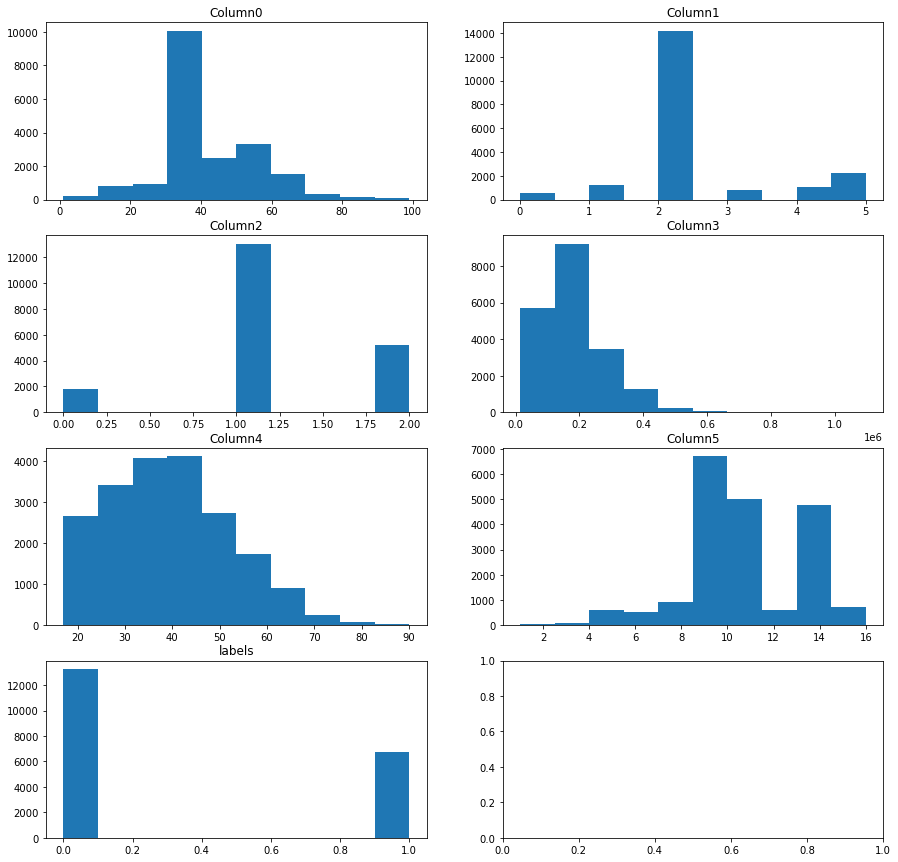

In [8]:
f, axs = plt.subplots(4,2,figsize=(15,15))
for i in range(6):
    test = data[:, i]

    axs[int(i/2)][i%2].hist(test)
    axs[int(i/2)][i%2].set_title('Column'+str(i))

axs[3][0].hist(label)
axs[3][0].set_title('labels')
plt.show()

In [44]:
df = pd.DataFrame(np.array([data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], label]).T, columns = ["hpw", "wc", "ms", "fnlwgt", "age", "enum", "label"])

In [45]:
df

,hpw,wc,ms,fnlwgt,age,enum,label
0,40,2,1,86872,25,9,0
1,40,2,1,259323,54,10,1
2,40,2,1,256813,43,14,1
3,70,2,1,118793,51,13,1
4,40,2,2,398918,28,9,0
...,...,...,...,...,...,...,...
19995,40,2,1,67001,46,16,1
19996,45,2,2,137314,36,11,0
19997,40,2,1,182323,32,5,0
19998,40,3,1,55272,47,10,1


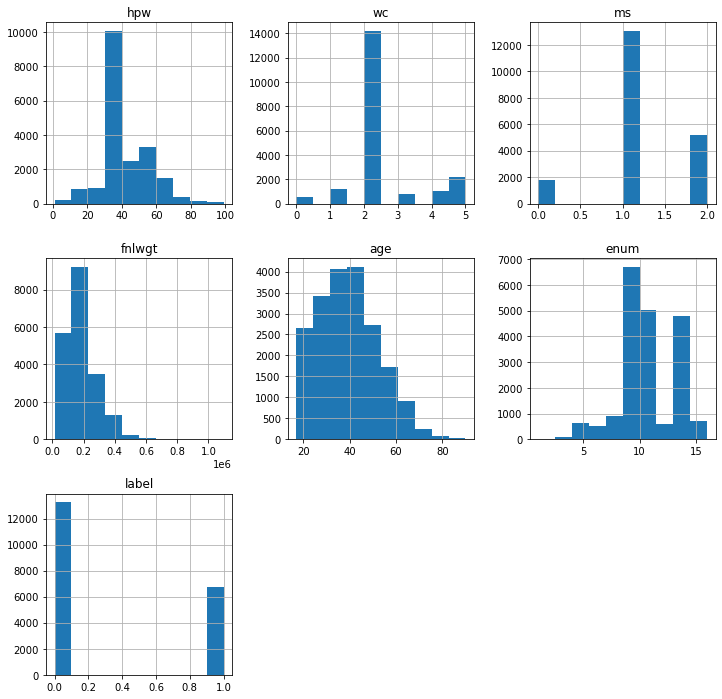

In [82]:
hist = df.hist(bins=10, figsize=(12, 12))

<ipython-input-85-feed8162c0a7>:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[int(i/2)][i%2].set_xticks(x, bins_label)


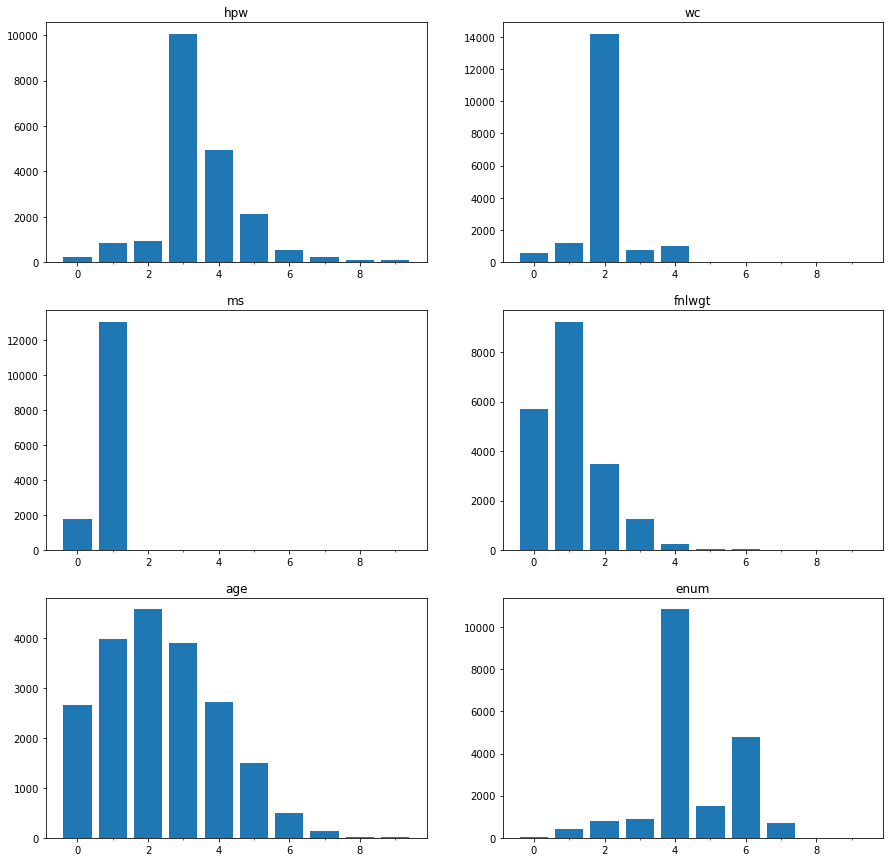

In [85]:
f, axs = plt.subplots(3,2,figsize=(15,15))
columns = ["hpw", "wc", "ms", "fnlwgt", "age", "enum", "label"]
for i in range(6):
    test = df[columns[i]]
    bins = list(range(test.min(), test.max()+int(np.ceil((test.max()-test.min())/10)), int(np.ceil((test.max()-test.min())/10))))
    bins_label = [x for x in bins]
    x = np.arange(10)
    val = np.arange(10)
    test_df = pd.cut(test, bins, right=False, labels=bins_label[:-1])
    u, f = np.unique(test_df.to_numpy(), return_counts = True)
    for k, fr in zip(u, f):
        try:
            val[bins.index(k)] = fr
        except:
            continue
    axs[int(i/2)][i%2].bar(x, val)
    axs[int(i/2)][i%2].set_xticks(x, bins_label)
    axs[int(i/2)][i%2].set_title(columns[i])

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18000, 6)
(2000, 6)
(18000,)
(2000,)


In [11]:

from classifier.KNearestNeighbor import KNearestNeighbor

In [12]:

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

In [13]:
y_test.shape

(2000,)

In [14]:

dists = classifier.compute_distances_no_loops(X_test)
print(dists.shape)

(2000, 18000)


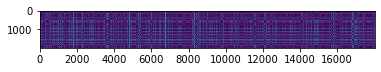

In [15]:

plt.imshow(dists, interpolation='none')
plt.show()

In [16]:
y_test_pred = classifier.predict_labels(dists, k=100)

In [17]:

num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / y_test.shape[0]
print('Got %d / %d correct => accuracy: %f' % (num_correct, y_test.shape[0], accuracy))

Got 1334 / 2000 correct => accuracy: 0.667000


In [18]:
import time
from sklearn.metrics import roc_curve

from sklearn.metrics import auc
from classifier.KNearestNeighbor import KNearestNeighbor

In [29]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 75, 100, 150, 200, 250, 300, 450, 500]

X_train_folds = []
y_train_folds = []
################################################################################
# TODO:                                                                        #
# Split up the training data into folds. After splitting, X_train_folds and    #
# y_train_folds should each be lists of length num_folds, where                #
# y_train_folds[i] is the label vector for the points in X_train_folds[i].     #
# Hint: Look up the numpy array_split function.                                #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# A dictionary holding the accuracies for different values of k that we find
# when running cross-validation. After running cross-validation,
# k_to_accuracies[k] should be a list of length num_folds giving the different
# accuracy values that we found when using that value of k.
k_to_accuracies = {}
k_to_time = {}
k_to_auc = {}


################################################################################
# TODO:                                                                        #
# Perform k-fold cross validation to find the best value of k. For each        #
# possible value of k, run the k-nearest-neighbor algorithm num_folds times,   #
# where in each case you use all but one of the folds as training data and the #
# last fold as a validation set. Store the accuracies for all fold and all     #
# values of k in the k_to_accuracies dictionary.                               #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

for k__ in k_choices:
  print(k__)
  n=0
  acc = 0
  k_to_accuracies[k__] = []
  k_to_time[k__] = []
  k_to_auc[k__] = []
  for i in range(num_folds):
    start_time = time.time()
    new_X_train = np.delete(X_train, range(n, n+len(X_train_folds[i])), 0)
    new_y_train = np.delete(y_train, range(n, n+len(y_train_folds[i])))

    """
    n+=len(X_train_folds[i])
    neigh = KNeighborsClassifier(n_neighbors=k__).fit(new_X_train, new_y_train)
    y_test_pred = neigh.predict(X_train_folds[i])
    """
    classifier.train(new_X_train, new_y_train)
    y_test_pred = classifier.predict(X_train_folds[i], k=k__)
    num_correct = np.sum(y_test_pred == y_train_folds[i])
    accuracy = float(num_correct) / len(y_train_folds[i])
    
    end_time = time.time()
    
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train_folds[i], y_test_pred)

    auc_keras = auc(fpr_keras, tpr_keras)
    
    k_to_accuracies[k__].append(accuracy)
    k_to_time[k__].append(end_time-start_time)
    k_to_auc[k__].append(auc_keras)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

1
3
5
8
10
12
15
20
50
75
100
150
200
250
300
450
500
k = 1, accuracy = 0.614722
k = 1, accuracy = 0.999722
k = 1, accuracy = 0.999722
k = 1, accuracy = 0.998889
k = 1, accuracy = 0.999444
k = 3, accuracy = 0.627778
k = 3, accuracy = 0.801944
k = 3, accuracy = 0.795278
k = 3, accuracy = 0.791944
k = 3, accuracy = 0.810833
k = 5, accuracy = 0.630000
k = 5, accuracy = 0.750000
k = 5, accuracy = 0.737778
k = 5, accuracy = 0.743333
k = 5, accuracy = 0.765556
k = 8, accuracy = 0.613889
k = 8, accuracy = 0.708889
k = 8, accuracy = 0.701667
k = 8, accuracy = 0.709722
k = 8, accuracy = 0.706944
k = 10, accuracy = 0.615000
k = 10, accuracy = 0.695833
k = 10, accuracy = 0.684444
k = 10, accuracy = 0.693889
k = 10, accuracy = 0.700278
k = 12, accuracy = 0.615000
k = 12, accuracy = 0.690278
k = 12, accuracy = 0.680278
k = 12, accuracy = 0.682778
k = 12, accuracy = 0.691944
k = 15, accuracy = 0.643889
k = 15, accuracy = 0.679722
k = 15, accuracy = 0.676944
k = 15, accuracy = 0.676667
k = 15, accura

[0.9225     0.76555556 0.72533333 0.68822222 0.67788889 0.67205556
 0.67261111 0.66572222 0.66433333 0.66188889 0.66283333 0.66277778
 0.66272222 0.66272222 0.66272222 0.66272222 0.66272222]
[0.15388919 0.06919065 0.04856661 0.03727219 0.03186614 0.02886356
 0.0147349  0.01196007 0.00533623 0.00531536 0.00617492 0.00611364
 0.00618491 0.00618491 0.00618491 0.00618491 0.00618491]


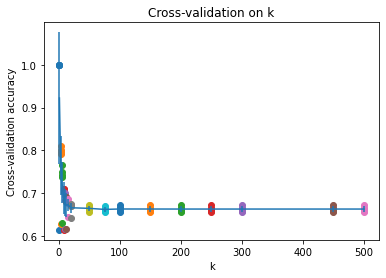

In [30]:
# plot the raw observations
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 75, 100, 150, 200, 250, 300, 450, 500]
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
print(accuracies_mean)
print(accuracies_std)
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

[4.23766856 4.1654779  4.22451243 4.20874004 4.25422482 4.28812742
 4.22391109 4.14552078 4.36712828 4.24863915 4.27894716 4.23129158
 4.25451803 4.25946198 4.19818687 4.24903822 4.33062015]
[0.04328288 0.02077095 0.02841568 0.05503581 0.03007291 0.05154278
 0.03067386 0.01902277 0.13090353 0.03285106 0.05544566 0.02256222
 0.05643563 0.05689678 0.03299331 0.0387392  0.04266284]


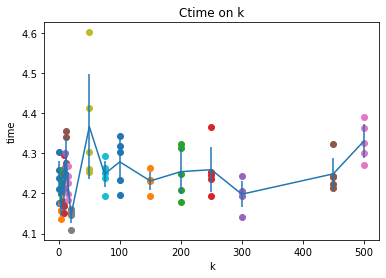

In [31]:
# plot the raw observations
for k in k_choices:
    times = np.array(k_to_time[k])
    plt.scatter([k] * len(times), times)

# plot the trend line with error bars that correspond to standard deviation
times_mean = np.array([np.mean(v) for k,v in sorted(k_to_time.items())])
times_std = np.array([np.std(v) for k,v in sorted(k_to_time.items())])
print(times_mean)
print(times_std)
plt.errorbar(k_choices, times_mean, yerr=times_std)
plt.title('Ctime on k')
plt.xlabel('k')
plt.ylabel('time')
plt.show()

[0.91481185 0.72308696 0.66137085 0.63525585 0.60836641 0.59150435
 0.55577634 0.54964564 0.5115445  0.50120264 0.50193329 0.50008045
 0.5        0.5        0.5        0.5        0.5       ]
[1.69136170e-01 8.12578108e-02 5.81248396e-02 4.51765400e-02
 3.94484835e-02 3.60079963e-02 2.13565100e-02 1.89747136e-02
 2.34073464e-03 8.93420570e-04 8.06208033e-04 1.60901046e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


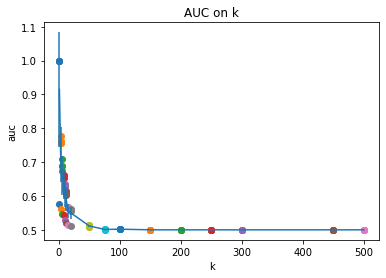

In [32]:
# plot the raw observations
for k in k_choices:
    aucs = np.array(k_to_auc[k])
    plt.scatter([k] * len(aucs), aucs)

# plot the trend line with error bars that correspond to standard deviation
auc_mean = np.array([np.mean(v) for k,v in sorted(k_to_auc.items())])
auc_std = np.array([np.std(v) for k,v in sorted(k_to_auc.items())])
print(auc_mean)
print(auc_std)
plt.errorbar(k_choices, auc_mean, yerr=auc_std)
plt.title('AUC on k')
plt.xlabel('k')
plt.ylabel('auc')
plt.show()

[0.2177995  0.18380391 0.171675   0.16352563 0.15935181 0.15671337
 0.15923737 0.16059594 0.15227157 0.15579248 0.15493171 0.156636
 0.1558085  0.15559821 0.15787982 0.15598184 0.153034  ]
[0.03677951 0.01674927 0.01114802 0.00872066 0.00757113 0.00623813
 0.00323087 0.00319977 0.00514824 0.00116985 0.00246324 0.00099817
 0.00319457 0.00095895 0.0026803  0.00195874 0.00068086]


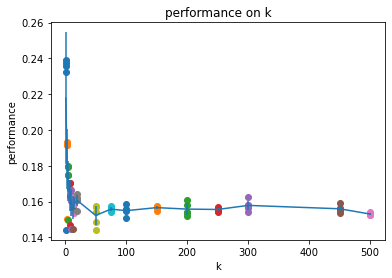

In [33]:
# plot the raw observations
k_to_performance = {}
for k in k_choices:
    performance = np.array(k_to_accuracies[k])/np.array(k_to_time[k])
    k_to_performance[k] = performance
    plt.scatter([k] * len(performance), performance)

# plot the trend line with error bars that correspond to standard deviation
performance_mean = np.array([np.mean(v) for k,v in sorted(k_to_performance.items())])
performance_std = np.array([np.std(v) for k,v in sorted(k_to_performance.items())])

print(performance_mean)
print(performance_std)
plt.errorbar(k_choices, performance_mean, yerr=performance_std)
plt.title('performance on k')
plt.xlabel('k')
plt.ylabel('performance')
plt.show()

In [24]:
# Based on the cross-validation results above, choose the best value for k,   
# retrain the classifier using all the training data, and test it on the test
# data. You should be able to get above 28% accuracy on the test data.
from classifier.KNearestNeighbor import KNearestNeighbor
best_k = 5

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / y_test.shape[0]
print('Got %d / %d correct => accuracy: %f' % (num_correct, y_test.shape[0], accuracy))

Got 1230 / 2000 correct => accuracy: 0.615000


In [25]:

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_test_pred = neigh.predict(X_test)

num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / y_test.shape[0]
print('Got %d / %d correct => accuracy: %f' % (num_correct, y_test.shape[0], accuracy))

Got 1230 / 2000 correct => accuracy: 0.615000


In [26]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / y_test.shape[0]
print('Got %d / %d correct => accuracy: %f' % (num_correct, y_test.shape[0], accuracy))

Got 1337 / 2000 correct => accuracy: 0.668500


[0] [2000]


Text(0.5, 1.0, 'labels')

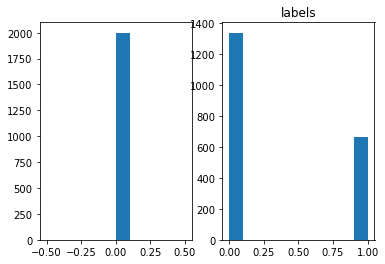

In [27]:
cnt, unique = np.unique(y_test_pred, return_counts =True)
print(cnt, unique)

plt.subplot(1, 2, 1)  
plt.hist(y_test_pred)
plt.subplot(1, 2, 2)  
plt.hist(y_test)
plt.title('labels')

[0.         0.24981301 1.        ]
[0.         0.34238311 1.        ]
0.5462850464390349


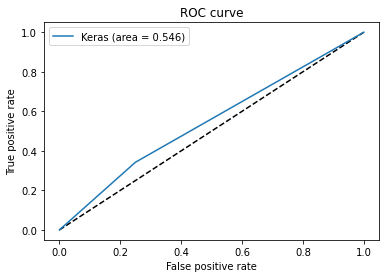

In [28]:


from sklearn.metrics import roc_curve
best_k = 5

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)
"""
neigh = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_test_pred = neigh.predict(X_test)
"""
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_test_pred)

print(fpr_keras)
print(tpr_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
print(auc_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


